# Worksheet 2

## Girls in Data Science Camp

In this worksheet, we will be working with the [Pokemon dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon/data), which contains 800+ Pokemon from all seven generations!

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/International_Pok%C3%A9mon_logo.svg/2560px-International_Pok%C3%A9mon_logo.svg.png width="500">

The dataset has been reduced with some columns removed. The dataset we will be working with contains the following information: 

- **name:** The English name of the Pokemon
- **pokedex_number:** The entry number of the Pokemon in the National Pokedex
- **percentage_male:** The percentage of the species that are male. Blank if the Pokemon is genderless.
- **type1:** The Primary Type of the Pokemon
- **type2:** The Secondary Type of the Pokemon
- **classification:** The Classification of the Pokemon as described by the Sun and Moon Pokedex
- **capture_rate:** Capture Rate of the Pokemon
- **height_m:** Height of the Pokemon in metres
- **weight_kg:** The Weight of the Pokemon in kilograms
- **hp:** The Base HP of the Pokemon
- **attack:** The Base Attack of the Pokemon
- **defense:** The Base Defense of the Pokemon
- **speed:** The Base Speed of the Pokemon
- **generation:** The numbered generation which the Pokemon was first introduced
- **is_legendary:** Denotes if the Pokemon is legendary.

In [1]:
# Load libraries
if (!require("pacman")) install.packages("pacman")
pacman::p_load(tidyverse, infer)

Loading required package: pacman



In [2]:
# Read in the data
pokemon <- read_csv("data/pokemon.csv")
head(pokemon)

Rows: 801 Columns: 15


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): name, type1, type2, classfication, is_legendary
dbl (10): pokedex_number, percentage_male, capture_rate, height_m, weight_kg...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,pokedex_number,percentage_male,type1,type2,classfication,capture_rate,height_m,weight_kg,hp,attack,defense,speed,generation,is_legendary
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Bulbasaur,1,88.1,grass,poison,Seed Pokemon,45,0.7,6.9,45,49,49,45,1,No
Ivysaur,2,88.1,grass,poison,Seed Pokemon,45,1.0,13.0,60,62,63,60,1,No
Venusaur,3,88.1,grass,poison,Seed Pokemon,45,2.0,100.0,80,100,123,80,1,No
Charmander,4,88.1,fire,NA,Lizard Pokemon,45,0.6,8.5,39,52,43,65,1,No
Charmeleon,5,88.1,fire,NA,Flame Pokemon,45,1.1,19.0,58,64,58,80,1,No
Charizard,6,88.1,fire,flying,Flame Pokemon,45,1.7,90.5,78,104,78,100,1,No


## Exercise 1: Creating scatter plots

### 1.1

How does the weight of the Pokemon change as they increase in height? 

Create a scatter plot of the Pokemon in the data set, with `height_m` on the x-axis and `weight_kg` on the y-axis.

What pattern do you observe in the data? Answer in 1-2 sentences.

Warning message:
“Removed 20 rows containing missing values or values outside the scale range (`geom_point()`).”


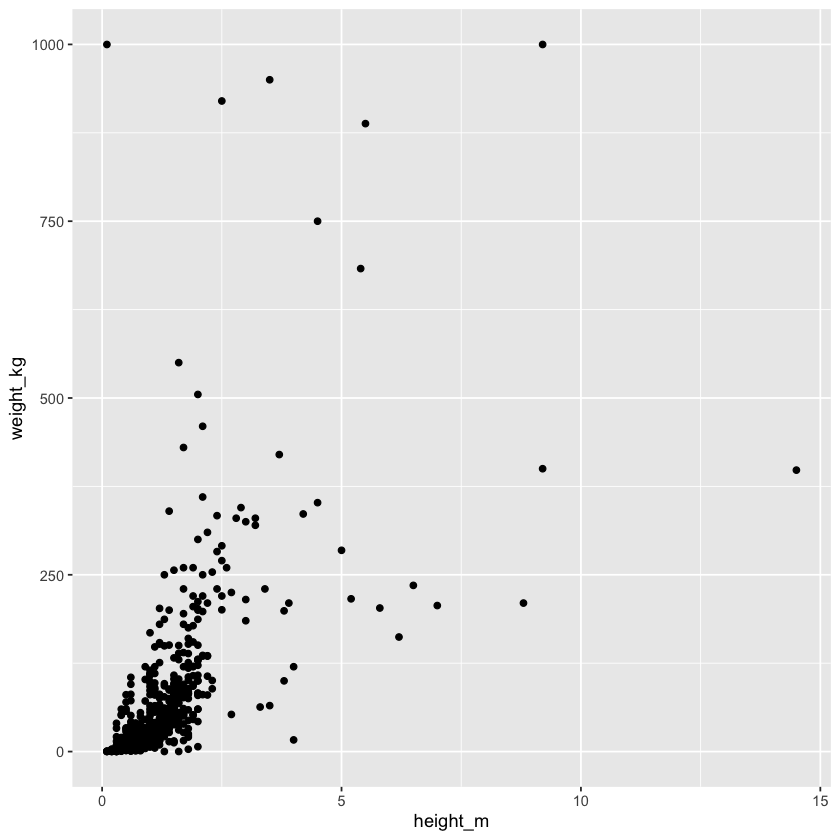

In [3]:
pokemon |> 
    ggplot(aes(x = height_m, y = weight_kg)) + 
       geom_point()

> **Answer:** As a Pokemon's height increases, the weight of the Pokemon also tends to increase.

### 1.2

Let's clean up the plot further and make it more "human readable".

Change the x- and y-axis by capitalizing the variable names; put any unit information inside brackets.

In addition, add a title to the plot. The title should **concisely** describe to the audience what the plot is showing (hint: what observation did more make in the previous exercise?)

Warning message:
“Removed 20 rows containing missing values or values outside the scale range (`geom_point()`).”


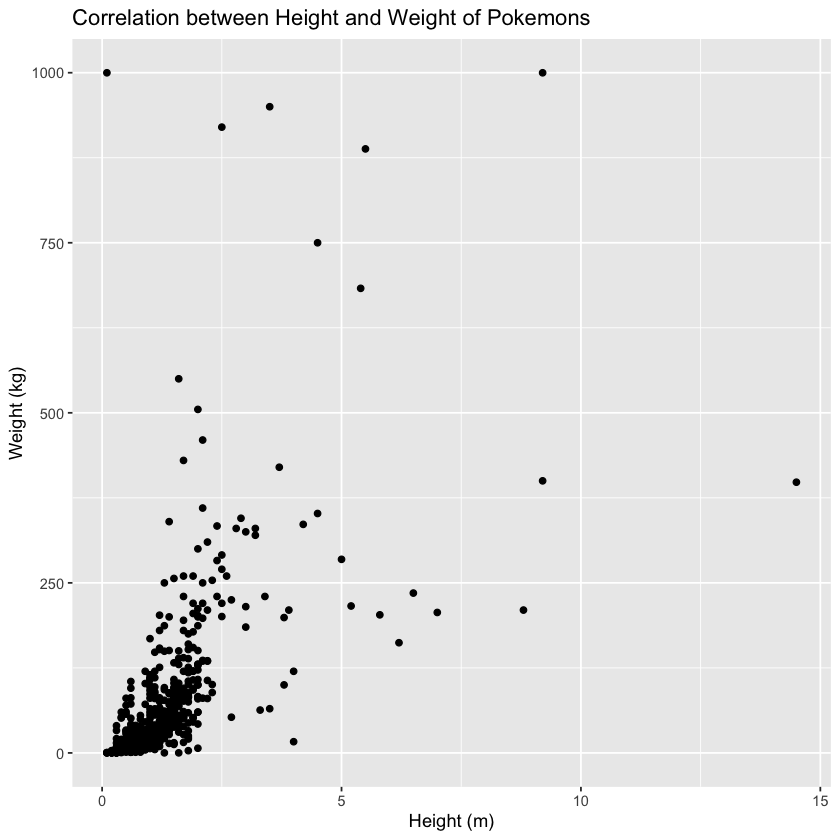

In [4]:
pokemon |> 
    ggplot(aes(x = height_m, y = weight_kg)) + 
        geom_point() + 
        labs(x = "Height (m)", 
             y = "Weight (kg)",
             title = "Correlation between Height and Weight of Pokemons"
        )

### 1.3

Make **at least 1** additional adjustments to the plot. This could be changing the size/colour/shape of the circles inside the scatter plot, changing the font size of the axis labels or title, overall look-and-feel of the plot aesthetics, etc. 

You can reference the below resources (or make use of Google if you want to try something else):

1. Changing plot colour: http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
   - Colour Cheat Sheet: https://sape.inf.usi.ch/sites/default/files/ggplot2-colour-names.png
3. Changing the shape/size of the point: http://www.cookbook-r.com/Graphs/Shapes_and_line_types/
4. Changing the overall aesthetic of the plot: https://book.rfortherestofus.com/themes

Warning message:
“Removed 20 rows containing missing values or values outside the scale range (`geom_point()`).”


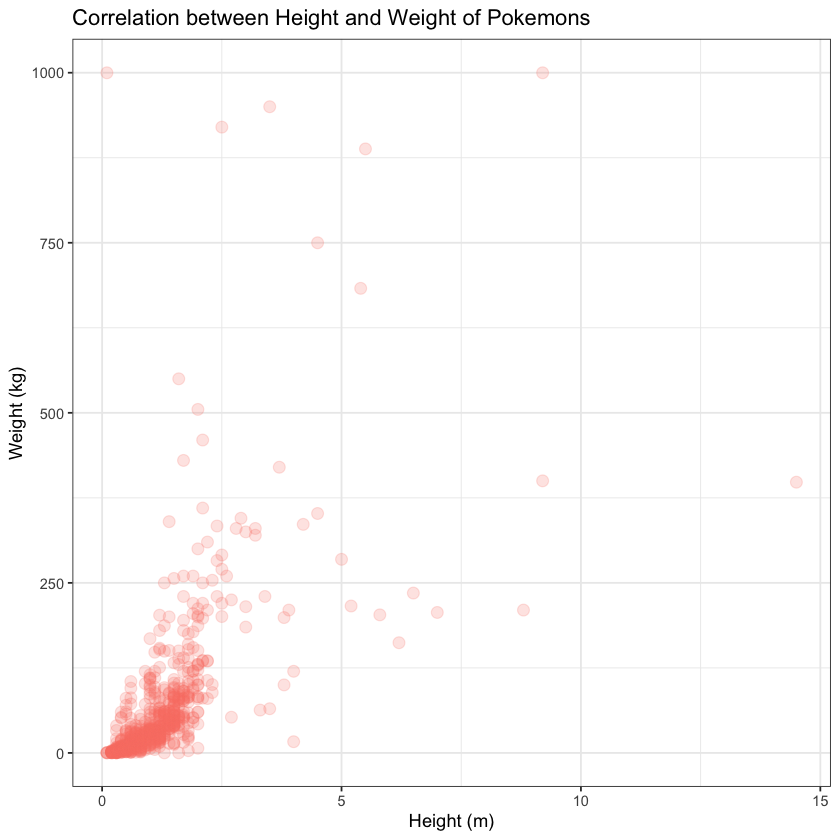

In [5]:
pokemon |> 
    ggplot(aes(x = height_m, y = weight_kg)) + 
        geom_point(size = 3, colour = 'salmon', alpha = 0.2) + 
        labs(x = "Height (m)", 
             y = "Weight (kg)",
             title = "Correlation between Height and Weight of Pokemons"
        ) + 
        theme_bw()

### 1.4 (Challenge)

Is the relationship between height and weight different for legendary vs non-legendary Pokemon? How could you inspect this visually?

(**Hint:** you can group your dataset by having 1 colour for the legendary Pokemon and 1 colour for the non-legendary ones.)

Warning message:
“Removed 20 rows containing missing values or values outside the scale range (`geom_point()`).”


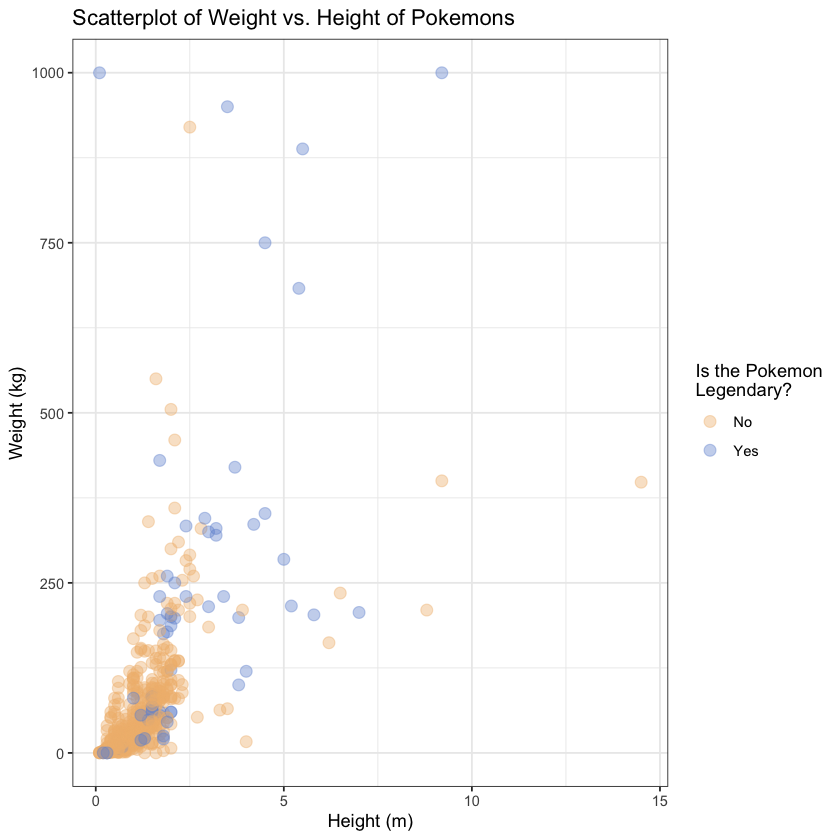

In [6]:
pokemon |> 
    ggplot(aes(x = height_m, y = weight_kg, colour=is_legendary)) + 
        geom_point(size = 3, alpha = 0.4) + 
        labs(x = "Height (m)", 
             y = "Weight (kg)",
             title = "Scatterplot of Weight vs. Height of Pokemons"
        ) + 
        theme_bw() + 
        # you can also customize the plot further
        scale_colour_manual("Is the Pokemon\nLegendary?", values=c("#F1BB7B", "#7294D4"))

## Exercise 2: Understanding Distributions

### 2.1

What is the distribution of **hp points** of all Pokemon in this dataset?

Plot a histogram of this information using a `binwidth` of 10 units. Make sure that the x- and y-axes are human readable and make sure to include a title.

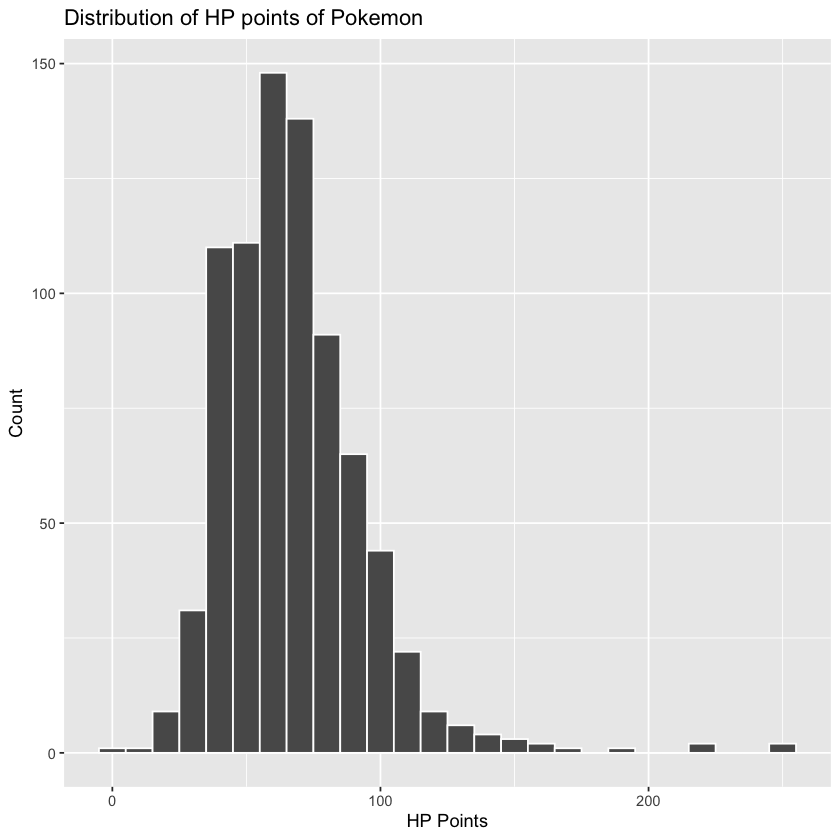

In [7]:
pokemon |> 
    ggplot(aes(x = hp)) +
        geom_histogram(binwidth = 10, colour = "white") + 
        labs(
            x = "HP Points", 
            y = "Count",
            title = "Distribution of HP points of Pokemon"
        )

### 2.2

What is the mean and standard deviation of Pokemons' HP points?

In [8]:
pokemon |> 
    summarise(
        Mean = mean(hp),
        SD = sd(hp)
    )

Mean,SD
<dbl>,<dbl>
68.9588,26.57601


### 2.3 

Is this distribution symmetric? Are there any outliers in the data? How did you determine if there were or weren't outliers (e.g., did you use a numeric cutoff, inspect the data visually, etc)?

> **Answer:** No, the distribution is not symmetric; there is positive skew (i.e., a longer tail to the distribution in higher values).
>
> In looking at the distribution, it does look like there are potential outliers in the data. If we consider outliers to be Pokemon whose HP points are 5 standard deviations above the mean, we see that there are 4 Pokemon that meet this criteria.

In [9]:
outlier_criteria = mean(pokemon$hp) + 5 * sd(pokemon$hp)

In [10]:
pokemon |> 
    filter(hp > outlier_criteria) |> 
    select(name, hp)

name,hp
<chr>,<dbl>
Chansey,250
Blissey,255
Zygarde,216
Guzzlord,223


## Exercise 3: Sampling

Run the following cell - we will be using this data frame for the remaining questions in this worksheet.

In [11]:
set.seed(930) # ensures that the sampling is reproducible
pokemon_encounters <- pokemon |> 
    drop_na(capture_rate, weight_kg) |> 
    uncount(weights = capture_rate) |> 
    slice(sample(1:n())) 

head(pokemon_encounters)

name,pokedex_number,percentage_male,type1,type2,classfication,height_m,weight_kg,hp,attack,defense,speed,generation,is_legendary
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Eevee,133,88.1,normal,NA,Evolution Pokemon,0.3,6.5,55,55,50,55,1,No
Oddish,43,50.0,grass,poison,Weed Pokemon,0.5,5.4,45,50,55,30,1,No
Venipede,543,50.0,bug,poison,Centipede Pokemon,0.4,5.3,30,45,59,57,5,No
Starly,396,50.0,normal,flying,Starling Pokemon,0.3,2.0,40,55,30,60,4,No
Remoraid,223,50.0,water,NA,Jet Pokemon,0.6,12.0,35,65,35,65,2,No
Spinarak,167,50.0,bug,poison,String Spit Pokemon,0.5,8.5,40,60,40,30,2,No


### 3.1

Assume the above dataframe represents a **population** of Pokemon in a given region. 

Imagine if you were to encounter and capture a random sample of **30 Pokemon** in this region. Create this sample using code and stored it in a new data frame called `pokemon_sample_30`.

In [12]:
set.seed(930) # ensures that the sampling is reproducible
pokemon_sample_30 <- pokemon_encounters |> 
                        rep_sample_n(size = 30) 

head(pokemon_sample_30)

replicate,name,pokedex_number,percentage_male,type1,type2,classfication,height_m,weight_kg,hp,attack,defense,speed,generation,is_legendary
<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Mudbray,749,50.0,ground,NA,Donkey Pokemon,1.0,110.0,70,100,70,45,7,No
1,Igglybuff,174,24.6,normal,fairy,Balloon Pokemon,0.3,1.0,90,30,15,15,2,No
1,Spiritomb,442,50.0,ghost,dark,Forbidden Pokemon,1.0,108.0,50,92,108,35,4,No
1,Cherrim,421,50.0,grass,NA,Blossom Pokemon,0.5,9.3,70,60,70,85,4,No
1,Meganium,154,88.1,grass,NA,Herb Pokemon,1.8,100.5,80,82,100,80,2,No
1,Gloom,44,50.0,grass,poison,Weed Pokemon,0.8,8.6,60,65,70,40,1,No


# 3.2

Plot a histogram of the **weight** of this sample of Pokemon. Use a `binwidth` of 15.

Compare the **average weight of this sample of 30 Pokemon** with the **average weight of all Pokemon in this region** by drawing 2 vertical lines on the graph: 
1. A solid red line that represents the average weight of the sample of 30 Pokemon 
2. A dotted blue line that represents the average weight lf all Pokemon in this region

Make sure that your axes are properly labelled and choose an appropriate title for the plot.

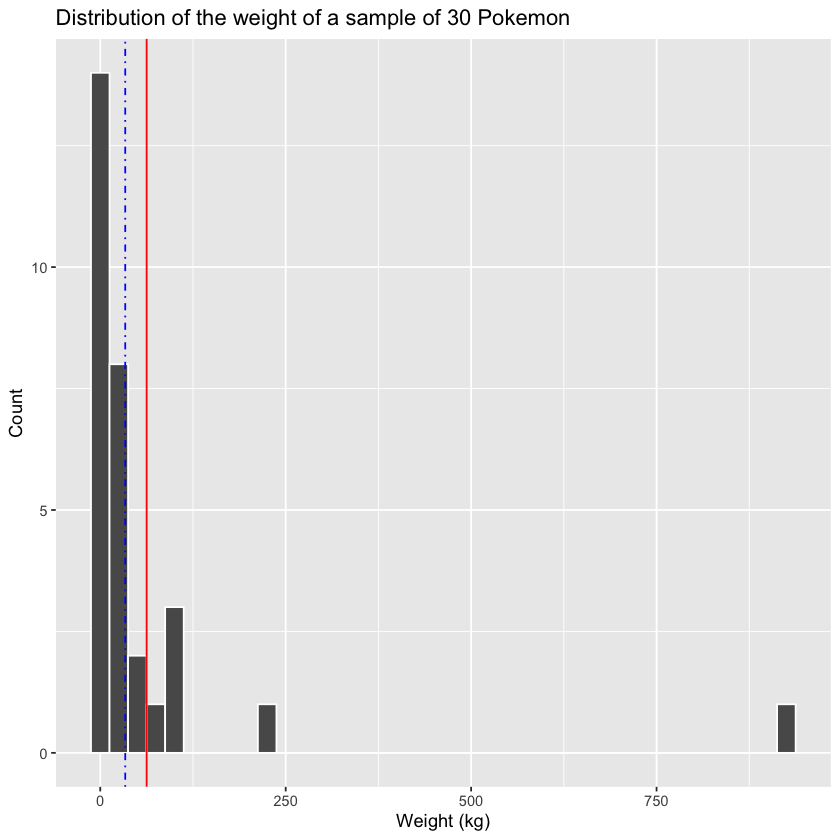

In [13]:
pokemon_sample_30 |> 
    ggplot(aes(x = weight_kg)) +
        geom_histogram(binwidth = 25, colour = "white") + 
        labs(
            x = "Weight (kg)", 
            y = "Count",
            title = "Distribution of the weight of a sample of 30 Pokemon"
        )+
        geom_vline(xintercept = mean(pokemon_sample_30$weight_kg), colour="red") + 
        geom_vline(xintercept = mean(pokemon_encounters$weight_kg), linetype="dotdash", colour="blue")

### 3.3

What do you notice about the two means? Is the sample mean higher or lower compared to the population mean?

> **Answer:** The sample mean is HIGHER than the population mean, meaning that in the sample, we've over estimated the population mean

### 3.4

Now, if you were take take a bigger sample of **100 Pokemon** from this region. What would the distribution look like? How does the mean of this sample compare to the population mean? 

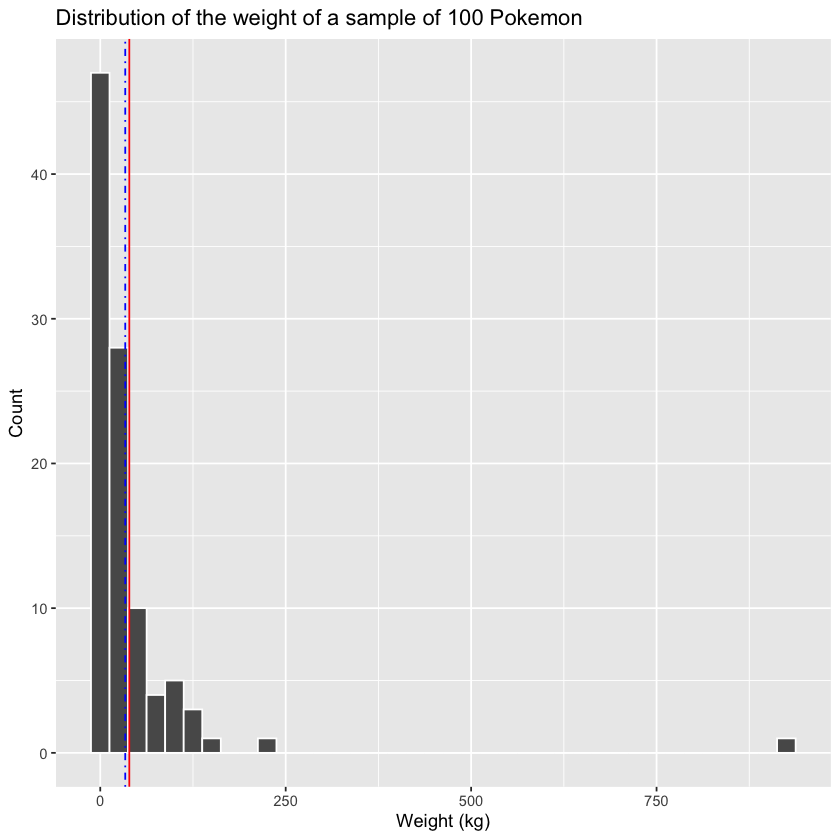

In [14]:
set.seed(930) # ensures that the sampling is reproducible
pokemon_encounters |> 
    rep_sample_n(size = 100) -> pokemon_sample_100

pokemon_sample_100 |> 
    ggplot(aes(x = weight_kg)) +
        geom_histogram(binwidth = 25, colour = "white") + 
        labs(
            x = "Weight (kg)", 
            y = "Count",
            title = "Distribution of the weight of a sample of 100 Pokemon"
        )+
        geom_vline(xintercept = mean(pokemon_sample_100$weight_kg), colour="red") + 
        geom_vline(xintercept = mean(pokemon_encounters$weight_kg), linetype="dotdash", colour="blue")

> **Answer:** The sample mean is now much closer to the population mean.